In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are? 
        How close can you get there are 26.
    C) Can you change color of one of them?
    D) Can you segment the leaves?
    
    

## A)

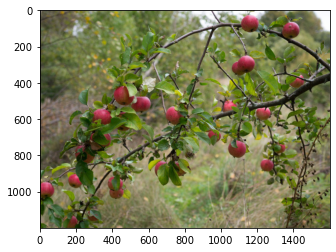

In [2]:
path = "appletree.jpg"
bgr_img = cv2.imread(path)

plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

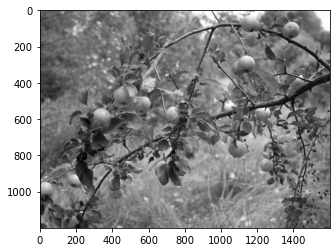

In [3]:
plt.imshow(bgr_img[:,:,-1], cmap="gray")

Thresholding a single channel won't probably do the job...

In [19]:
def empty_function(*args):
    pass

def ThresholdBGRTrackbar(img):
    """
    input:
    img - BGR image
    
    returns:
    bgr_thresh - merged BGR image with each channel thresholded
    """
    win_name = "ThresholdTrackbar"
    img = img.copy()

    cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(win_name, 1000,500)
    
    cv2.createTrackbar("threshold_B", win_name, 40, 255, empty_function)
    cv2.createTrackbar("threshold_G", win_name, 60, 255, empty_function)
    cv2.createTrackbar("threshold_R", win_name, 125, 255, empty_function)

    while True:
        th_B = cv2.getTrackbarPos("threshold_B", win_name)
        th_G = cv2.getTrackbarPos("threshold_G", win_name)
        th_R = cv2.getTrackbarPos("threshold_R", win_name)
        
        img_temp = img.copy()
        (b, g, r) = cv2.split(img_temp)
        thresholded_B = cv2.threshold(b, th_B, 255, cv2.THRESH_BINARY_INV)[1]
        thresholded_G = cv2.threshold(g, th_G, 255, cv2.THRESH_BINARY_INV)[1]
        thresholded_R = cv2.threshold(r, th_R, 255, cv2.THRESH_BINARY)[1]
        bgr_thresh = cv2.merge((thresholded_B, thresholded_G, thresholded_R))
        cv2.imshow(win_name, bgr_thresh)
        
        # Code exits "while true loop" by pressing letter 'c'
        key = cv2.waitKey(1) & 0xFF
        if key == ord("c"):
            break

    cv2.destroyAllWindows()
    return bgr_thresh


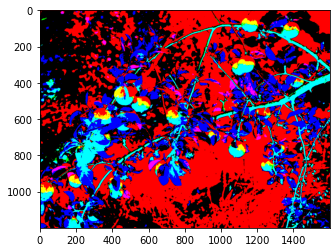

In [20]:
th = ThresholdBGRTrackbar(bgr_img)
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

Still quite bad, although it can be argued that the yellow parts on this image are where "apples are"...

Below is internet example used on our image.

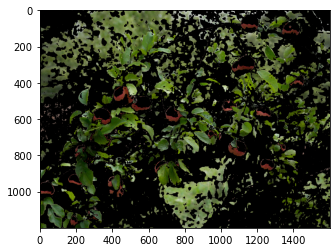

In [29]:
## convert to hsv
hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

## mask of green (36,0,0) ~ (70, 255,255)
mask_g = cv2.inRange(hsv, (36, 0, 0), (70, 255,255))

## mask of red (0,50,50) ~ (10,255,255)
mask_r = cv2.inRange(hsv, (0,50,50), (10,255,255))

## final mask and masked
mask = cv2.bitwise_or(mask_g, mask_r)
target = cv2.bitwise_and(bgr_img,bgr_img, mask=mask)

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))

In [37]:
def HSVTrackbar(img):
    """
    input:
    img - HSV image
    
    returns:
    target - original image masked
    mask - binary image of mask
    """
    win_name = "ThresholdTrackbar"
    img = img.copy()

    cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(win_name, 1000,500)
    
    cv2.createTrackbar("lowH", win_name, 0, 255, empty_function)
    cv2.createTrackbar("lowS", win_name, 65, 255, empty_function)
    cv2.createTrackbar("lowV", win_name, 50, 255, empty_function)
    cv2.createTrackbar("highH", win_name, 10, 255, empty_function)
    cv2.createTrackbar("highS", win_name, 255, 255, empty_function)
    cv2.createTrackbar("highV", win_name, 255, 255, empty_function)
    
    while True:
        lowH = cv2.getTrackbarPos("lowH", win_name)
        lowS = cv2.getTrackbarPos("lowS", win_name)
        lowV = cv2.getTrackbarPos("lowV", win_name)
        highH = cv2.getTrackbarPos("highH", win_name)
        highS = cv2.getTrackbarPos("highS", win_name)
        highV = cv2.getTrackbarPos("highV", win_name)
        
        img_temp = img.copy()
        mask = cv2.inRange(img_temp, (lowH, lowS, lowV), (highH, highS, highV))
        target = cv2.bitwise_and(img_temp, img_temp, mask=mask)
        cv2.imshow(win_name, cv2.cvtColor(target, cv2.COLOR_HSV2BGR))
        
        # Code exits "while true loop" by pressing letter 'c'
        key = cv2.waitKey(1) & 0xFF
        if key == ord("c"):
            break

    cv2.destroyAllWindows()
    return target, mask

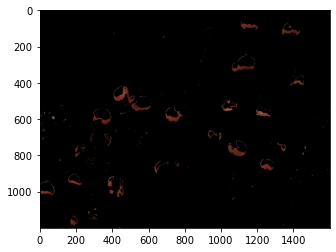

In [38]:
th, mask = HSVTrackbar(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV))
plt.imshow(cv2.cvtColor(th, cv2.COLOR_HSV2RGB))

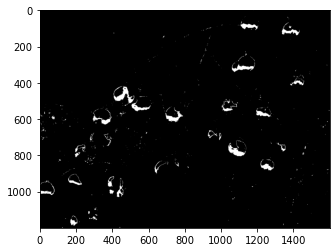

In [39]:
plt.imshow(mask, cmap="gray")

This looks promising. Probably should do morph to get rid of some smaller dots and have more valid contours for the next step of (Canny edge detection and) <code>cv2.findContours()</code>.

# Weekly project part 2
    A) Remove the greenscreen and replace the background in "itssp.png"?
    B) Can improve the edge with erroding/dialating?